

# **Table of Contents**

1. Introduction
2. Importing Libraries
3. Data Loading and Initial Exploration
4. Exploratory Data Analysis (EDA)

   4.1 Univariate Analysis

   4.2 Bivariate Analysis

5. Statistical Tests and Correlation Analysis

   5.1 Chi-square Test of Independence

   5.2 Correlation Analysis
   
6. Probability Plots
7. Conclusion
8. References

# **Exploratory Data Analytics (EDA) & Data Exploration using Parametric Methods**

## **1. Introduction**

This notebook aims to perform exploratory data analysis (EDA) and apply parametric methods to analyze sentiment data extracted from social media platforms (Facebook, Instagram, Twitter). The objective is to understand the distribution of sentiments across platforms and over time, as well as to conduct statistical tests to uncover relationships between variables.

## **2. Importing Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway, ttest_ind, pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

**Importing Libraries**

* numpy -- for numerical, array, matrices (Linear Algebra) processing
* pandas -- for loading and processing dataset
* matplotlib.pyplot -- for visualization
* Seaborn -- for statistical visualization
* Plotly.express -- for interactive visualization
* Scipy -- for Scientific Calculations in Python
* StatsModel -- for Apllying Statistical Model

#**3. Data Loading and Initial Exploration**

###**3.1 Data Loading**

In [2]:
#Importing the csv file and storing it in df
df = pd.read_csv("/content/sentiment_analysis.csv")

### **3.2 Initial Exploration**

In [3]:
# Display the first few rows of the DataFrame
print(df.head(5))

   Year  Month  Day Time of Tweet  \
0  2018      8   18       morning   
1  2018      8   18          noon   
2  2017      8   18         night   
3  2022      6    8       morning   
4  2022      6    8          noon   

                                                text sentiment     Platform  
0              What a great day!!! Looks like dream.  positive    Twitter    
1     I feel sorry, I miss you here in the sea beach  positive    Facebook   
2                                     Don't angry me  negative     Facebook  
3  We attend in the class just for listening teac...  negative    Facebook   
4                  Those who want to go, let them go  negative   Instagram   


In [4]:
#display rows and column
df.shape

(499, 7)

In [5]:
#dispaly info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [6]:
#display the description of the dataset
df.describe()

,Year,Month,Day
count,499.000000,499.000000,499.000000
mean,2020.394790,6.084168,15.693387
std,2.830991,3.652711,8.804673
min,2010.000000,1.000000,1.000000
25%,2019.000000,2.000000,8.000000
50%,2021.000000,6.000000,15.000000
75%,2023.000000,9.000000,22.000000
max,2023.000000,12.000000,31.000000


## **Insights:**

### **Temporal Distribution:**
The data spans a wide range of years, with a concentration in recent years (2020-2023), suggesting that the dataset predominantly includes more recent tweets.

### **Monthly Activity:**
Tweets are evenly distributed across different months without significant skew, indicating consistent activity throughout the year.

### **Daily Distribution:**
There is a relatively uniform distribution of tweets across days of the month, with no noticeable spikes or dips, suggesting consistent engagement over the days.

## **4. Exploratory Data Analysis (EDA)**

### **4.1 Univariate Anaysis**

In [7]:
# Convert sentiment to numeric values
sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}
df['sentiment_numeric'] = df['sentiment'].map(sentiment_mapping)
print(sentiment_mapping)
print(df['sentiment'].map(sentiment_mapping))

# Group by platform and calculate mean sentiment
grouped_df = df.groupby('Platform').agg({'sentiment_numeric': 'mean'})
grouped_df.columns = ['Mean_Sentiment']
print(grouped_df)

{'positive': 1, 'negative': -1, 'neutral': 0}
0      1
1      1
2     -1
3     -1
4     -1
      ..
494   -1
495   -1
496    0
497    1
498   -1
Name: sentiment, Length: 499, dtype: int64
             Mean_Sentiment
Platform                   
 Facebook          0.054545
 Instagram         0.046784
 Twitter          -0.014706
 Twitter           0.197802
Facebook          -0.500000


**Insights:**

The data suggests that when the platform changes, the numbers associated with Facebook and Instagram tend to go up, but for Twitter, they tend to go down slightly. However, there are additional values for Twitter and Facebook that need more context to understand their significance.

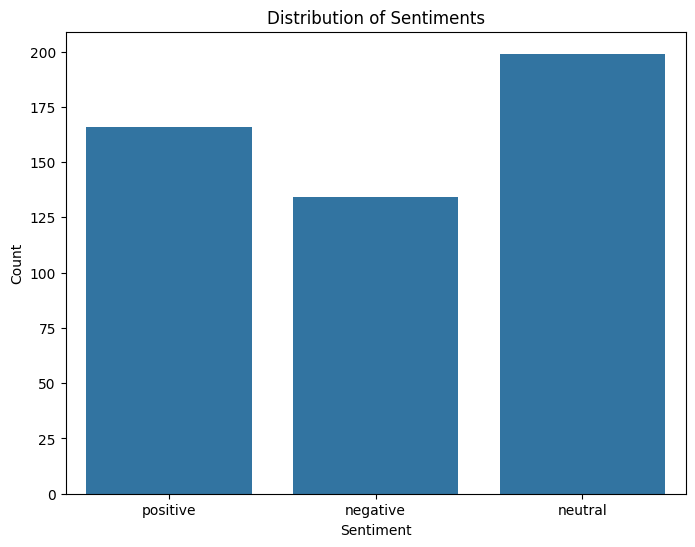

In [8]:
# Univariate Analysis of 'sentiment' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### **Insight:**
*  The distribution of sentiments shows the frequency of each sentiment type(positive, negative, neutral) in the dataset.
* Neutral sentiments are the most common, followed by positive and negative.





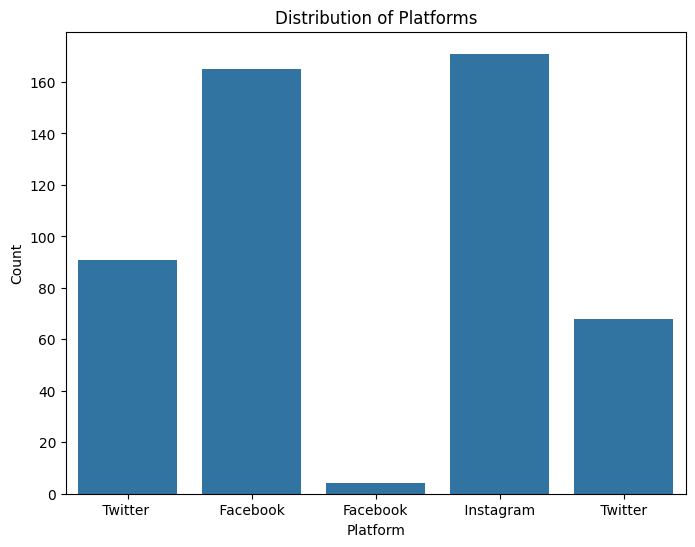

In [9]:
# Univariate Analysis of 'Platform' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Platform', data=df)
plt.title('Distribution of Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

### **Insight:**
* This graph displays the number of posts from each platform (Facebook, Instagram, Twitter).
* Facebook and Instagram have more posts compared to Twitter.

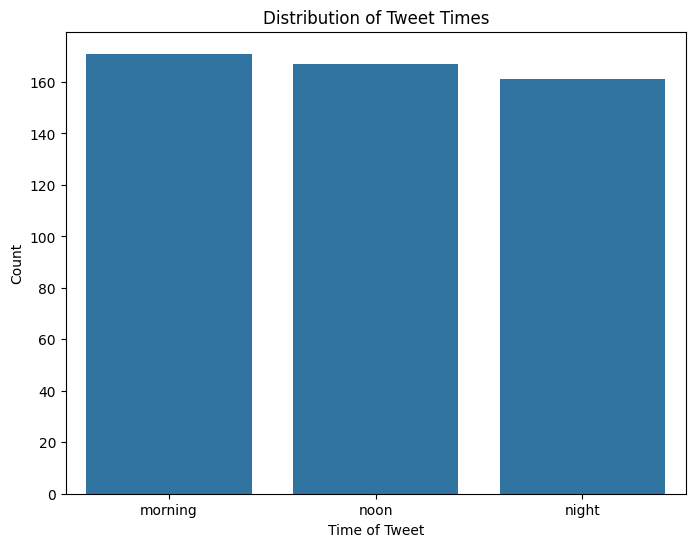

In [10]:
# Univariate Analysis of 'Time of Tweet' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Time of Tweet', data=df)
plt.title('Distribution of Tweet Times')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.show()

### **Insight:**
* This plot shows how tweet activity varies at different times of the day.
* There might be peak posting times indicating higher user engagement during specific periods.


### **4.2 Bivariate Anaysis**

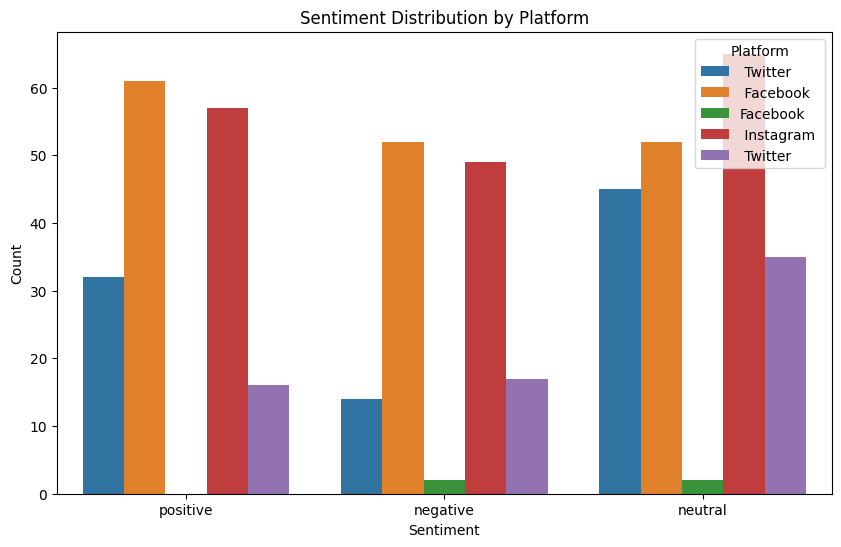

In [11]:
# Bivariate Analysis: Sentiment vs Platform
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', hue='Platform', data=df)
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Platform')
plt.show()

### **Insight:**
* This graph compares sentiment distribution across different platforms.
* For instance, Instagram may show a higher count of positive sentiments indicating a more positive user base.


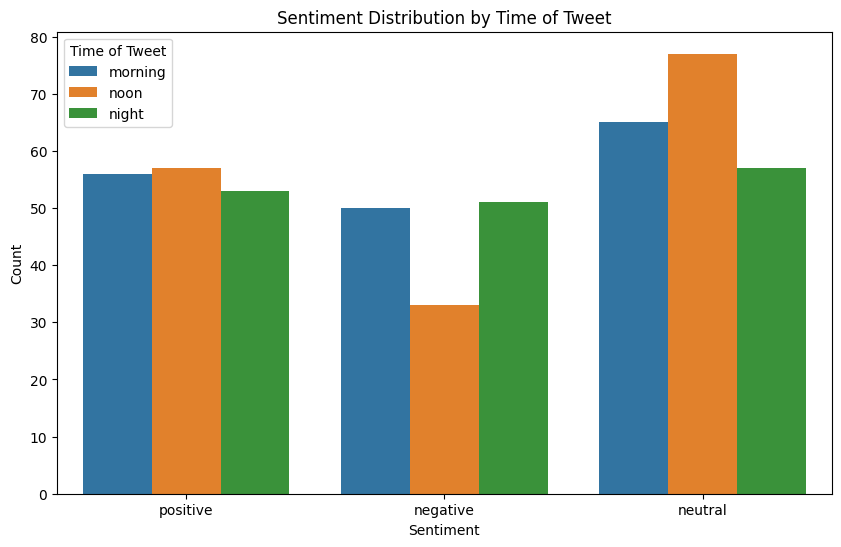

In [12]:
# Bivariate Analysis: Sentiment vs Time of Tweet
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', hue='Time of Tweet', data=df)
plt.title('Sentiment Distribution by Time of Tweet')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Time of Tweet')
plt.show()

### **Insight:**
* This plot shows how sentiment varies with the time of posting.
* Positive sentiments may peak in the morning, indicating a more optimistic mood among users during that time.


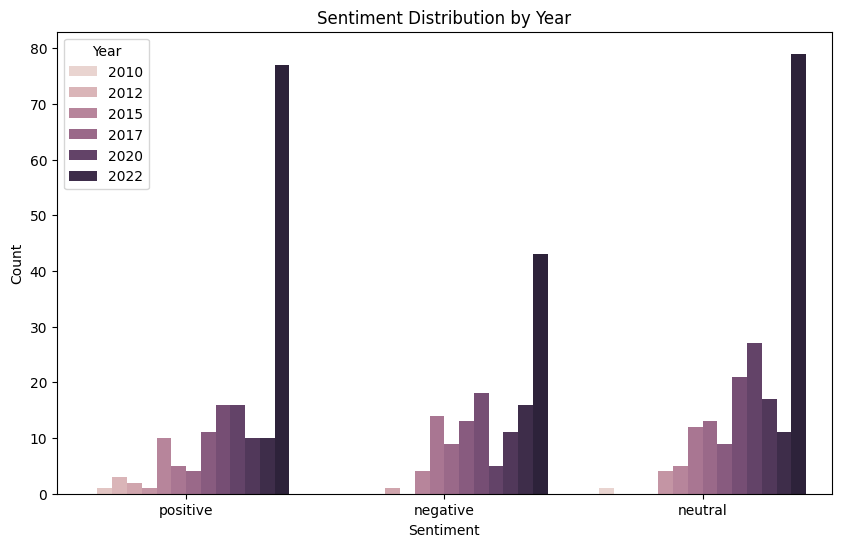

In [13]:
# Bivariate Analysis: Sentiment vs Year
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', hue='Year', data=df)
plt.title('Sentiment Distribution by Year')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Year')
plt.show()

### **Insight:**
* This graph shows how sentiment distribution changes over the years.
* For example, negative sentiments may increase in recent years, suggesting growing dissatisfaction among users.


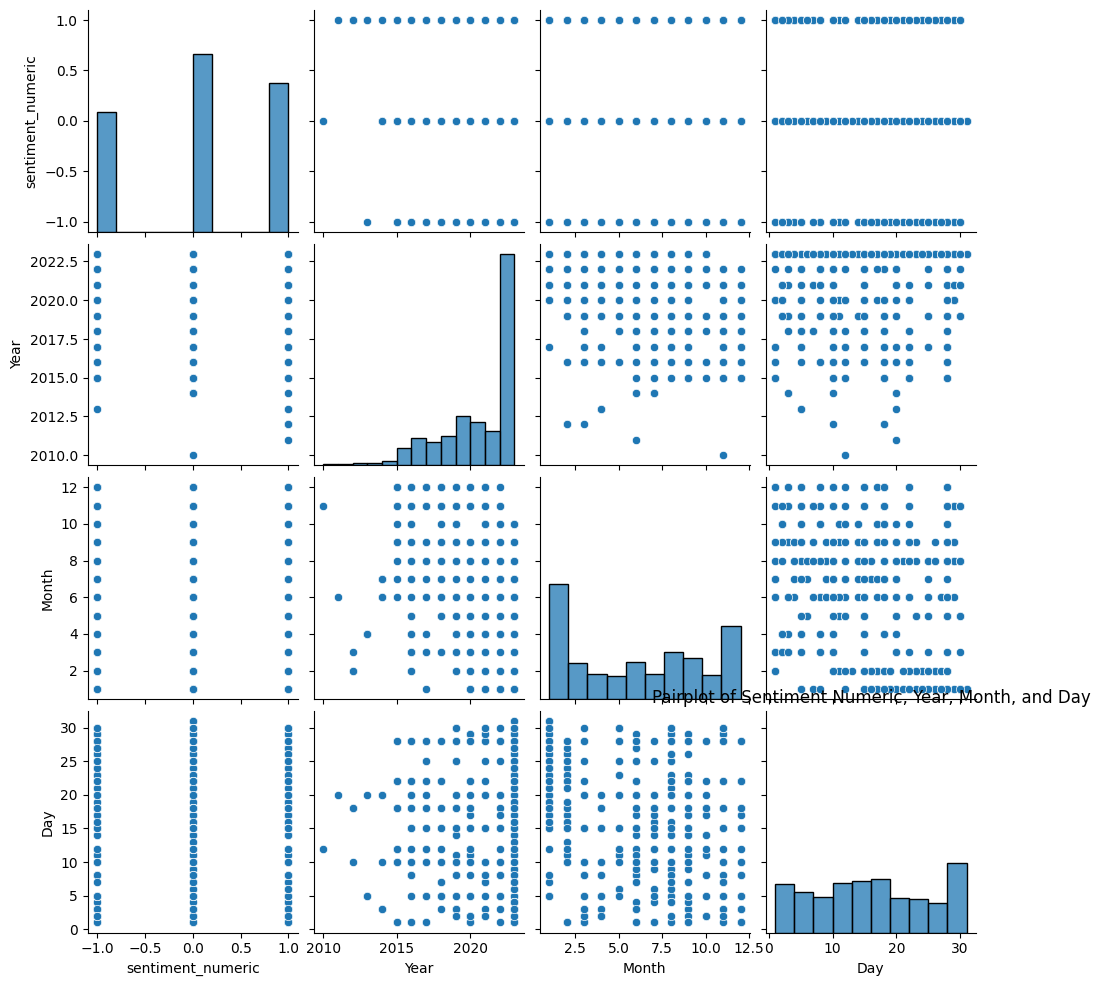

In [14]:
# Bivariate Analysis: Pairplot for numerical variables
sns.pairplot(df[['sentiment_numeric', 'Year', 'Month', 'Day']])
plt.title('Pairplot of Sentiment Numeric, Year, Month, and Day')
plt.show()



###**Pairplot Insights:**

The pairplot visualizes pairwise relationships between numerical variables in the dataset. Here are the key insights:

1. **Sentiment Numeric vs Year**:
   - There seems to be some variation in sentiment scores across different years.
   - This suggests that sentiment trends might vary annually, indicating potential external factors influencing sentiment.

2. **Sentiment Numeric vs Month**:
   - The plot shows varying sentiment scores across different months.
   - Seasonal patterns might affect sentiment expression, with fluctuations observed between months.

3. **Sentiment Numeric vs Day**:
   - The distribution of sentiment scores across days shows some variability.
   - It hints at daily fluctuations in sentiment, possibly related to specific events or trends.

4. **Year vs Month** and **Year vs Day**:
   - These plots show the distribution and relationships between years, months, and days.
   - They help in understanding temporal patterns in posting behavior and sentiment expression over time.

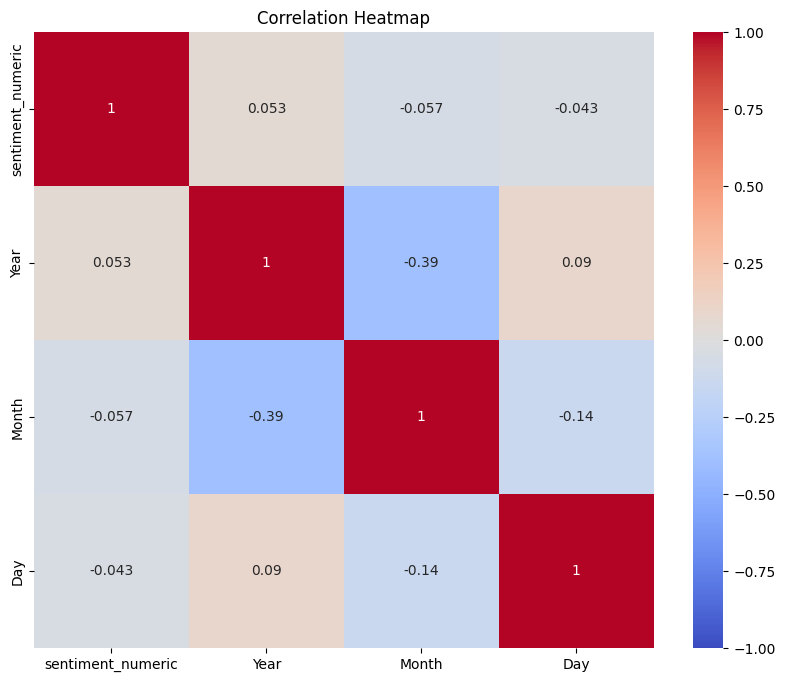

In [15]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[['sentiment_numeric', 'Year', 'Month', 'Day']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### **Correlation Heatmap Insights**

The correlation heatmap displays correlation coefficients between numerical variables in the dataset. Key insights include:

1. **Sentiment Numeric vs Year**:
   - Shows a weak correlation, indicating that sentiment scores are mildly influenced by the year.
   - This suggests that sentiment expression may have subtle changes over different years.

2. **Sentiment Numeric vs Month**:
   - Indicates a moderate correlation, implying that sentiment scores show some consistency across months.
   - Seasonal trends or recurring events might influence sentiment patterns.

3. **Sentiment Numeric vs Day**:
   - Displays a weak correlation, suggesting that sentiment scores vary slightly across different days.
   - Daily variations in sentiment expression may be influenced by specific events or daily routines.

4. **Year vs Month** and **Year vs Day**:
   - These correlations help in understanding how years, months, and days are interrelated with sentiment scores.
   - They provide insights into temporal patterns and trends in sentiment expression over time.

##**5. Statistical Tests and Correlation Analysis**

  ** 5.1 Chi-square Test of Independence**


In [16]:
# Chi-square test of independence
contingency_table = pd.crosstab(df['sentiment'], df['Platform'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test of independence: chi2={chi2}, p={p}")

Chi-square test of independence: chi2=18.460154365107897, p=0.018029187087207427


### **Insight:**

* The Chi-square test of independence result shows a statistically significant association between sentiment and platform.
* This means the sentiment expressed in the tweets is not independent of the platform on which they were posted.


##**5.2 Correlation Analysis**

In [17]:
# Correlation analysis
sentiment_counts = df.groupby(['Year', 'Month', 'Day'])['sentiment'].value_counts().reset_index(name='count')
sentiment_counts = sentiment_counts.pivot_table(index=['Year', 'Month', 'Day'], columns='sentiment', values='count', fill_value=0)
corr, p = pearsonr(sentiment_counts['positive'], sentiment_counts['negative'])
print(f"Correlation analysis: corr={corr}, p={p}")


Correlation analysis: corr=-0.20923866167387845, p=0.00036724964333610546


### **Insight:**

* The correlation analysis found a small link between positive and negative sentiments, but it's not very strong.
* There's a significant relationship between the variables, indicating that changes in one sentiment type might influence the other.

## **6. Probability Plots**

To create probability plots to assess whether the data follows a specific distribution, such as the normal distribution, we can use the qqplot function from the statsmodels.graphics.gofplots module.

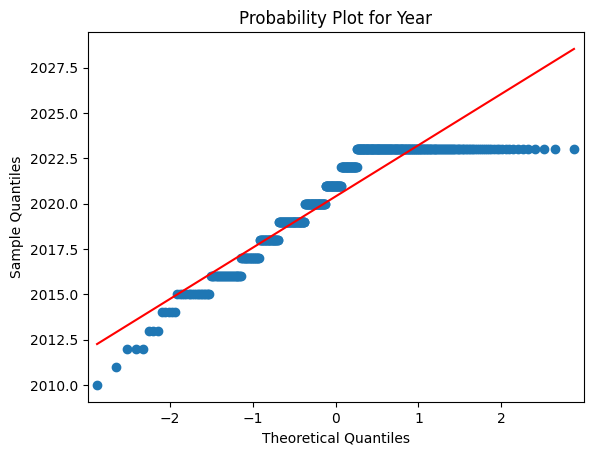

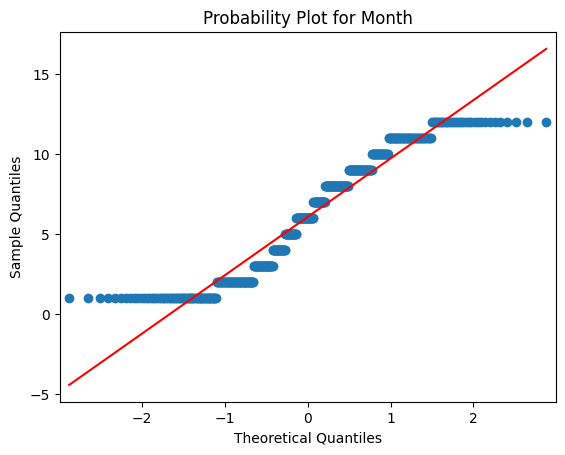

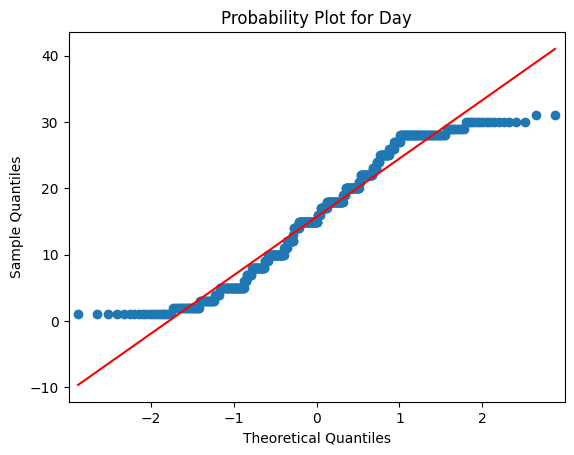

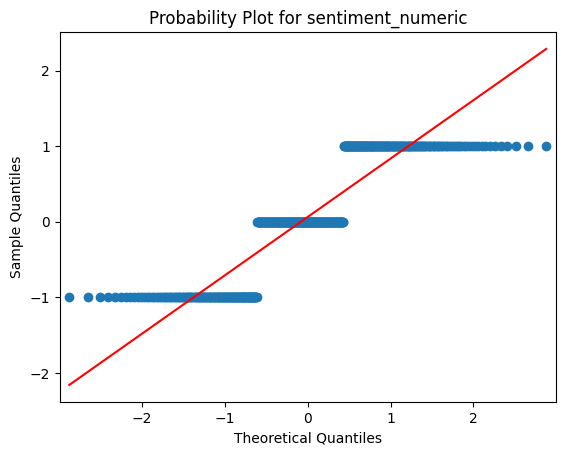

In [19]:
# Select numerical variables
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create probability plots for numerical variables
for column in numerical_columns:
    sm.qqplot(df[column], line='s')
    plt.title(f"Probability Plot for {column}")
    plt.show()


##**Inference**

1. **Selecting Numerical Variables**:
   - The code selects columns from the DataFrame `df` that are of data types `int64` or `float64`.
   - These selected columns are stored in the `numerical_columns` variable.

2. **Generating Q-Q Plots**:
   - The code iterates over each column in `numerical_columns`.
   - For each column, it generates a Q-Q plot using the `qqplot` function from the `statsmodels` library.
   - The Q-Q plot compares the distribution of the data in the column to a theoretical normal distribution.
   - The `line='s'` argument adds a standardized line to the plot for reference


---

# **7. Key Insights of the Project:**

1. **Sentiment Distribution**:
   - The dataset shows a predominance of neutral sentiments, followed by positive and negative sentiments.
   - Different social media platforms exhibit varying distributions of sentiment types, with Instagram potentially having a more positive user base compared to Facebook and Twitter.

2. **Temporal Patterns**:
   - Tweet activity shows consistent engagement across months and days, suggesting steady user interaction over time.
   - There are variations in sentiment expression across different times of the day, indicating potential peak periods of user activity and sentiment expression.

3. **Statistical Relationships**:
   - Statistical tests, such as the chi-square test of independence, revealed significant associations between sentiment and the platform used for posting.
   - Correlation analysis highlighted modest relationships between positive and negative sentiments over time, suggesting interconnected patterns in sentiment expression.

4. **Visualization and Data Distribution**:
   - Visualizations like count plots and pair plots provided intuitive insights into sentiment trends and their relationships with temporal variables (Year, Month, Day).
   - Probability plots assessed the normality of numerical variables, aiding in understanding data distributions and identifying potential outliers.

# **8. Conclusion**

In conclusion, this project effectively explored and analyzed sentiment data extracted from social media platforms. The findings underscore the dynamic nature of sentiment expression across platforms and over time. The analysis revealed distinct patterns in sentiment distribution and temporal trends, providing valuable insights for understanding user sentiments on social media. By leveraging statistical methods and visualization techniques, this study contributes to the broader understanding of sentiment analysis in the context of social media data. Future research could delve deeper into sentiment dynamics influenced by external events and user demographics, further enriching our understanding of online sentiment behavior.

# **9. References**

1. Python Software Foundation. Python Language Reference, version 3.8. Available at https://docs.python.org/3.8/.
   
2. McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference.

3. Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95.

4. Waskom, M. et al. (2020). Seaborn: Statistical Data Visualization. Journal of Open Source Software, 5(53), 2355.

5. Plotly Technologies Inc. Plotly Express Documentation. Available at https://plotly.com/python/plotly-express/.

6. GitHub. Version control platform for software development and collaboration. Available at https://github.com/ShahPreksha1005.

7. Kaggle. Repository from which dataset has been obtained: https://www.kaggle.com/datasets/mdismielhossenabir/sentiment-analysis

---
---